<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_ASL_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download ASL data from Kaggle
https://www.kaggle.com/general/74235

1. Create a Kaggle account or link it with an existing one (e.g., Gmail).

2. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

3. Click on Create New API Token - It will download kaggle.json file on your machine.

In [ ]:
# install library
! pip install -q kaggle

In [ ]:
# import files class to upload files to colab
from google.colab import files

In [ ]:
# upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pkasnesis","key":"d202848b9a00e8f6959f9753b8abf697"}'}

In [ ]:
# Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download asl dataset and unzip to asl folder
! kaggle datasets download 'grassknoted/asl-alphabet'
! mkdir asl
! unzip asl-alphabet.zip  -d asl

Streaming output truncated to the last 5000 lines.
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothin

In [ ]:
ls

asl/  asl-alphabet.zip  kaggle.json  sample_data/


In [ ]:
import matplotlib.pyplot as plt
from time import time
import os
import cv2
import numpy as np

from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

%matplotlib inline

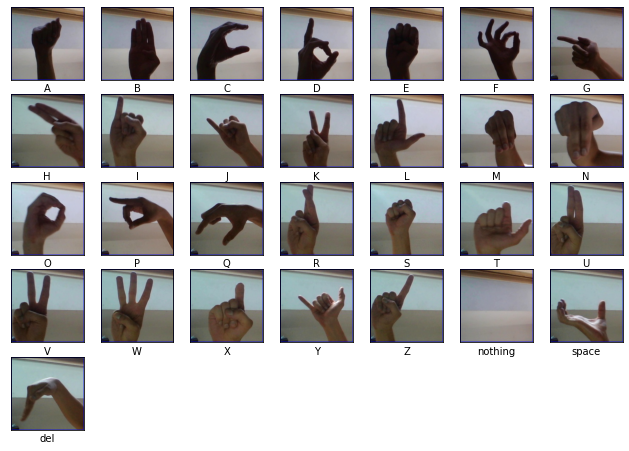

In [ ]:
train_dir = 'asl/asl_alphabet_train/asl_alphabet_train'
test_dir = 'asl/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [ ]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 0)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(train_dir)
print('Loading:', time() - start)

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)
Loading: 54.10762667655945


In [ ]:
classes = 29
batch = 128
epochs = 5
learning_rate = 0.0001

In [ ]:
# build model architecture
model = Sequential()
model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(29, activation='softmax'))

In [ ]:
adam = Adam(lr=learning_rate)
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1, callbacks=[save_model])

Epoch 1/5
551/551 [==============================] - 31s 54ms/step - loss: 1.0200 - accuracy: 0.7206 - val_loss: 0.0732 - val_accuracy: 0.9778

Epoch 00001: val_loss improved from inf to 0.07323, saving model to best_model.h5
Epoch 2/5
551/551 [==============================] - 30s 55ms/step - loss: 0.0635 - accuracy: 0.9808 - val_loss: 0.0283 - val_accuracy: 0.9925

Epoch 00002: val_loss improved from 0.07323 to 0.02834, saving model to best_model.h5
Epoch 3/5
551/551 [==============================] - 31s 56ms/step - loss: 0.0258 - accuracy: 0.9928 - val_loss: 0.0454 - val_accuracy: 0.9875

Epoch 00003: val_loss did not improve from 0.02834
Epoch 4/5
551/551 [==============================] - 31s 56ms/step - loss: 0.0260 - accuracy: 0.9925 - val_loss: 0.0207 - val_accuracy: 0.9936

Epoch 00004: val_loss improved from 0.02834 to 0.02073, saving model to best_model.h5
Epoch 5/5
551/551 [==============================] - 31s 56ms/step - loss: 0.0187 - accuracy: 0.9947 - val_loss: 0.0032

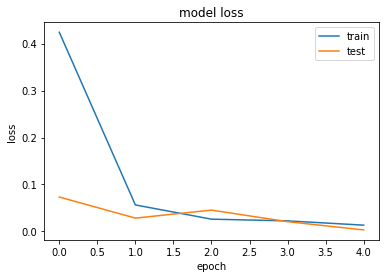

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

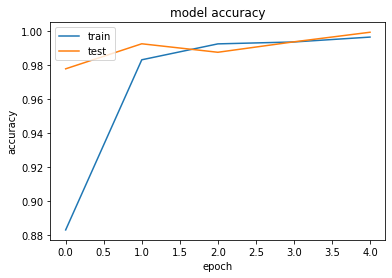

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.model.load_weights('best_model.h5')
np.mean(np.round(history.model.predict(x_test))==y_test)

0.9999524375743163